In [1]:
import torch

In [2]:
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
import numpy as np
import os
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import seaborn as sns
import random

In [4]:
#to display youtube videos
from IPython.display import YouTubeVideo

In [5]:
def set_seed(seed = 1234):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    
    torch.backends.cudnn.deterministics = True
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device used is {}".format(device))
    

device used is cuda


In [10]:
n_input = 4
n_neuron = 1

input_1 = torch.tensor([[1,2,1,2],[14,1,15,2],[12,11,5,6],[6,4,5,7]],dtype = torch.float32)
print(input_1.shape)

input_2 = torch.tensor([[1,2,4,2],[1,5,4,7],[14,15,16,14],[1,0,2,0]], dtype = torch.float32)
print(input_2.shape)

torch.Size([4, 4])
torch.Size([4, 4])


In [11]:
class RnnVnilla(nn.Module):
    #init function where we create architecture
    def __init__(self, n_input, n_neuron):
        super(RnnVnilla, self).__init__()
        
        #intially weights are random
        #U contains connections weights between input and current time step
        
        self.U = torch.randn(n_input, n_neuron)
        #W is connection between ouput of one time step to input of next time step
        
        self.W = torch.randn(n_neuron, n_neuron)
        
        #bias 
        self.b = torch.zeros(1, n_neuron)
        
    #forward fuction where we apply achitecture to the input
    
    def forward(self, input_0, input_1):
        self.layer1 = torch.tanh(torch.matmul(input_0, self.U) + self.b)
        self.layer2 = torch.tanh(torch.matmul(self.layer1, self.W) + torch.matmul(input_1, self.U) + self.b)
        return self.layer1, self.layer2
    

    
        
        
    

In [13]:
rnn_vanilla = RnnVnilla(n_input, n_neuron)

output0, output1 = rnn_vanilla(input_1, input_2)
print(output0, "\n", output1)

tensor([[0.8093],
        [1.0000],
        [1.0000],
        [1.0000]]) 
 tensor([[0.9999],
        [0.9998],
        [1.0000],
        [0.9994]])


In [16]:
#single layer multiple neurons

input_1 = torch.tensor([[1,2,3],[3,4,5],[4,5,6],[1,1,1]], dtype = torch.float32)
input_2 = torch.tensor([[15,16,17],[17,18,19],[19,20,21],[2,2,2]],dtype = torch.float32)
print(input_1.shape, input_2.shape)

torch.Size([4, 3]) torch.Size([4, 3])


In [17]:
n_input = 3
n_neuron = 4

multi_rnn = RnnVnilla(n_input, n_neuron)

output_1, output_2 = multi_rnn(input_1, input_2)
print("output of the layers are: output 1 = {} \n output 2 = {}".format(output_1, output_2))

output of the layers are: output 1 = tensor([[-0.1889, -0.9931, -0.8588,  0.9858],
        [-0.2641, -0.9997, -0.9874,  0.9910],
        [-0.3005, -0.9999, -0.9963,  0.9928],
        [-0.0396, -0.6759, -0.5510,  0.1131]]) 
 output 2 = tensor([[-0.2954, -1.0000, -1.0000,  1.0000],
        [-0.2573, -1.0000, -1.0000,  1.0000],
        [-0.3105, -1.0000, -1.0000,  1.0000],
        [-0.5174, -0.5021,  0.1257,  0.9158]])


In [20]:
#weights and other parameters of network
print(f"U : {multi_rnn.U} \n W : {multi_rnn.W} \n B: { multi_rnn.b}")

U : tensor([[ 0.1021, -0.2590, -0.1549, -1.3706],
        [-0.1319,  0.8848, -0.2611,  0.6104],
        [-0.0098, -1.4473, -0.2039,  0.8738]]) 
 W : tensor([[-0.3393,  0.1559,  0.8966, -0.2968],
        [ 1.5985, -0.0469, -1.5270, -2.0143],
        [-0.7690, -1.5606, -0.5309,  0.2178],
        [ 1.3232,  1.8169,  0.6808,  0.7244]]) 
 B: tensor([[0., 0., 0., 0.]])


In [6]:
my_transform = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.MNIST('data', train= True, transform=my_transform, download= True)
test_data = torchvision.datasets.MNIST('data', train= False, transform= my_transform, download = True)

In [54]:
#Rnn architecture for Mnist dataset

class Rnn_for_MNIST(nn.Module):
    def __init__(self, batch_size, in_size, hidden_size, out_size):
        super(Rnn_for_MNIST, self).__init__()
        self.batch_size, self.in_size, self.hidden_size, self.out_size = batch_size, in_size, hidden_size, out_size
        self.Rnn = nn.RNN(in_size, hidden_size)
        #fully connected layer
        self.Fc_layer = nn.Linear(hidden_size, self.out_size)
        
    def forward(self, image, prints = False):
        if prints :print("Shape of input image: {}".format(image.shape))
        image = image.permute(1,0,2)
        
        if prints : print("shape of permuted image :",image.shape)
            
        #Intialize hidden state with zeros
        
        hidden_state = torch.zeros(1, self.batch_size, self.hidden_size)
        
        if prints : print("Shape of hidden state = ", hidden_state.shape)
        
        #creating Rnn
        
        hidden_outputs, hidden_state = self.Rnn(image, hidden_state)
        #Log probabilities
        
        out = self.Fc_layer(hidden_state)
        
        if prints :print("--hidden_output", hidden_outputs.shape,"\n"+ "--hidden_state shape", hidden_state.shape, "\n" + "--out shape:", out.shape)
        
        out = out.view(-1, self.out_size)
        if prints: print("out shape:", out.shape)
        return out

In [37]:
batch_size = 64
in_size = 28
out_size = 10
hidden_size = 150


In [38]:
#create dataloader to select batch from it
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64)
print(train_loader)

#select one batch from the loader 

image_example, label_example = next(iter(train_loader))
print("image shape (input):", image_example.shape)
#reshape

image_example = image_example.reshape(-1, 28,28)

print("reshaped image shape:", image_example.shape)

Rnnmodel = Rnn_for_MNIST(batch_size = batch_size, in_size = in_size, hidden_size = hidden_size, out_size=out_size)

out = Rnnmodel(image_example,prints = True)




image shape (input): torch.Size([64, 1, 28, 28])
reshaped image shape: torch.Size([64, 28, 28])
Shape of input image: torch.Size([64, 28, 28])
shape of permuted image : torch.Size([28, 64, 28])
Shape of hidden state =  torch.Size([1, 64, 150])
--hidden_output torch.Size([28, 64, 150]) 
--hidden_state shape torch.Size([1, 64, 150]) 
--out shape: torch.Size([1, 64, 10])
out shape: torch.Size([64, 10])


In [42]:
#understand model parameters
print("length of model parametrs:", len(list(Rnnmodel.parameters())), "\n" + 
      'parameter U:',list(Rnnmodel.parameters())[0].shape,"\n" + "Parameter W:",list(Rnnmodel.parameters())[1].shape, "\n" + "Parameter2 Bias:",list(Rnnmodel.parameters())[2].shape, "\n" + "parameter 3 Bias:", list(Rnnmodel.parameters())[3].shape, "\n" + "Parameter 4 FNN weights:", list(Rnnmodel.parameters())[4].shape, "\n"+
      "paranmetr 5 Predictions:",list(Rnnmodel.parameters())[5].shape)

length of model parametrs: 6 
parameter U: torch.Size([150, 28]) 
Parameter W: torch.Size([150, 150]) 
Parameter2 Bias: torch.Size([150]) 
parameter 3 Bias: torch.Size([150]) 
Parameter 4 FNN weights: torch.Size([10, 150]) 
paranmetr 5 Predictions: torch.Size([10])


In [47]:
print(out.max(dim = 1)[1])

tensor([7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1])


In [28]:
def get_accuracy(out, actual_labels, batch_size):
    prediction = out.max(dim = 1)[1]
    correct = (prediction == actual_labels).sum().item()
    accuracy = correct/ batch_size
    
    return accuracy


        

In [56]:
def train_network(model, train_data, test_data, batch_size = 64, num_epoch = 1, learning_rate = 0.001):
    print("Get data ready")
    train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle= True, drop_last= True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, drop_last = True)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay= 0.001)
    
    print("Training started")
    
    #training the data multiple time
    
    for epoch in range(num_epoch):
        
        
        #save train and test loss
        train_loss = 0
        train_accuracy = 0
        
        #set model in training mode
        model.train()
        
        for k, (images, labels) in enumerate(train_loader):
            images = images.view(-1,28,28)
            
            #create log probabilities
            out = model(images)
            
            #clear the gradients from previous iterations
            optimizer.zero_grad()
            
            #compute loss: how far the prediciton from the actual
            
            loss = criterion(out, labels)
            #compute gradients for neurons
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item()
            train_accuracy += get_accuracy(out, labels, batch_size)
            
            
        #Print average train accuraccy for each epoch
        print("Train | epoch:{} | Loss:{:.2f} | accuracy:{:2f}".format(epoch +1, train_loss / k, train_accuracy / k))
        
    print("Testing started")
    
    model.eval()
    
    test_acc = 0
    
    for k, (images, labels) in enumerate(test_loader):
        #chaging channels of images
        images = images.view(-1,28,28)
        
        #input to model
        
        out = model(images)
        
        #finding accuracy
        test_acc += get_accuracy(out, labels,batch_size)
    print("Test accuracy as per {} dataLoader is {:.2f}".format(k, test_acc / k))

In [61]:
batch_size = 64
input_size = 28
hidden_size = 150
output_size = 10
learning_rate = 0.0005
#initalize model

Rnn_mode1 = Rnn_for_MNIST(batch_size=batch_size, in_size=input_size, out_size= output_size, hidden_size = hidden_size)
 #Train
train_network(Rnn_mode1, train_data, test_data, num_epoch=30, learning_rate=learning_rate)


Get data ready
Training started
Train | epoch:1 | Loss:1.15 | accuracy:0.583801
Train | epoch:2 | Loss:0.57 | accuracy:0.822466
Train | epoch:3 | Loss:0.34 | accuracy:0.901008
Train | epoch:4 | Loss:0.27 | accuracy:0.923494
Train | epoch:5 | Loss:0.22 | accuracy:0.939002
Train | epoch:6 | Loss:0.19 | accuracy:0.945847
Train | epoch:7 | Loss:0.16 | accuracy:0.954310
Train | epoch:8 | Loss:0.15 | accuracy:0.957849
Train | epoch:9 | Loss:0.14 | accuracy:0.961789
Train | epoch:10 | Loss:0.12 | accuracy:0.965261
Train | epoch:11 | Loss:0.12 | accuracy:0.967565
Train | epoch:12 | Loss:0.11 | accuracy:0.970069
Train | epoch:13 | Loss:0.10 | accuracy:0.970737
Train | epoch:14 | Loss:0.10 | accuracy:0.973090
Train | epoch:15 | Loss:0.09 | accuracy:0.973257
Train | epoch:16 | Loss:0.09 | accuracy:0.975761
Train | epoch:17 | Loss:0.09 | accuracy:0.976496
Train | epoch:18 | Loss:0.08 | accuracy:0.977330
Train | epoch:19 | Loss:0.08 | accuracy:0.977497
Train | epoch:20 | Loss:0.08 | accuracy:0.9768

In [53]:
class MultiRnn(nn.Module):
    def __init__(self, input_size, hidden_size,layer_size, output_size, relu: True):
        super(MultiRnn, self).__init__()
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
        if relu:
            self.rnn = nn.RNN(self.input_size, self.hidden_size, layer_size, batch_first = True, nonlinearity = 'relu')
        else:
            self.rnn = nn.RNN(input_size, hidden_size, layer_size, batch_first = True, nonlinearity = 'tanh')
            
        
        self.fnn = nn.Linear(hidden_size, output_size)
        
    def forward(self, images, prints = False):
        if prints: print(images.shape)
        
        hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
        hidden_state = hidden_state.requires_grad_()
        if prints: print("shape of first hidden state:",hidden_state.shape)
        
        #RNN
        #to solve vanishing gradient problem we are using .detach()
        
        output, hidden_state= self.rnn(images, hidden_state.detach())
        if prints: print( "Shape of Rnn layre is output:", output.shape,"\n" +"shpae of hidden layer:", hidden_state.shape)
        
        #we get rid of second dimentions:
        output = output[:, -1, :]
        if prints: print("output.shpae",output.shape)
        fcnn_out = self.fnn(output)
        
        if prints : print("fcnn_output shape is:", fcnn_out.shape)
        return fcnn_out

In [57]:
batch_size =64
input_size = 28
output_size = 10
hidden_size = 100
layer_size = 3


In [58]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64)

#train single batch of image:
images, labels = next(iter(train_loader))

print("Orignal images shape",images.shape)
#remove channels from images:
images = images.reshape(-1,28,28)
print("input image shape:" , images.shape)

multi_layer_rnn = MultiRnn(input_size,hidden_size, layer_size, output_size,relu= True)
print(multi_layer_rnn)

out = multi_layer_rnn(images, prints = True)
print(out.shape)

Orignal images shape torch.Size([64, 1, 28, 28])
input image shape: torch.Size([64, 28, 28])
MultiRnn(
  (rnn): RNN(28, 100, num_layers=3, batch_first=True)
  (fnn): Linear(in_features=100, out_features=10, bias=True)
)
torch.Size([64, 28, 28])
shape of first hidden state: torch.Size([3, 64, 100])
Shape of Rnn layre is output: torch.Size([64, 28, 100]) 
shpae of hidden layer: torch.Size([3, 64, 100])
output.shpae torch.Size([64, 100])
fcnn_output shape is: torch.Size([64, 10])
torch.Size([64, 10])


In [7]:
def train_function(model, train_data, test_data, batch_size, num_epochs = 1, lr_rt = 0.001):
    
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size, shuffle=True, drop_last = True)
    test_accuracy = 0
    
    print("training is started")
    
    for i in range(num_epochs):
        train_loss = 0
        train_accuracy = 0
        
        critereion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters() ,lr=lr_rt)
        model.train()
        
        for k,(images, labels) in enumerate(train_loader):
            
            images= images.reshape(-1, 28, 28)
            
            out = model(images)
            
            optimizer.zero_grad()
            
            loss = critereion(out, labels)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item()
            
            train_accuracy += get_accuracy(out, labels, batch_size)
            
        print("Trining at :{} epoch has train loss: {:.2f} and accuracy :{:.3f}".format(i + 1, train_loss/ k, train_accuracy / k ))
        
    print("testing started")
    
    model.eval()
    
    for k,(images, labels) in enumerate(test_loader):
        
        images = images.reshape(-1,28, 28)
        
        
        
        test_loss = 0
        
        test_out = model(images)
        
       # test_loss += critereion(test_out, labels).detach()
        test_accuracy += get_accuracy(test_out, labels, batch_size)
    print(k, test_accuracy)
    print("Testing loss: {} and accuracy :{}".format(test_loss / k , test_accuracy / k))
    

In [60]:
num_epochs = 10
learning_rate = 0.001


train_function(multi_layer_rnn, train_data, test_data, batch_size, num_epochs = num_epochs, lr_rt = learning_rate)

training is started
Trining at :1 epoch has train loss: 0.68 and accuracy :0.764
Trining at :2 epoch has train loss: 0.21 and accuracy :0.939
Trining at :3 epoch has train loss: 0.16 and accuracy :0.954
Trining at :4 epoch has train loss: 0.13 and accuracy :0.964
Trining at :5 epoch has train loss: 0.11 and accuracy :0.970
Trining at :6 epoch has train loss: 0.09 and accuracy :0.973
Trining at :7 epoch has train loss: 0.08 and accuracy :0.976
Trining at :8 epoch has train loss: 0.08 and accuracy :0.978
Trining at :9 epoch has train loss: 0.08 and accuracy :0.980
Trining at :10 epoch has train loss: 0.07 and accuracy :0.980
testing started
155 153.15625
Testing loss: 0.0 and accuracy :0.9881048387096775


In [23]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, layer_size, bidirectional = True):
        super(LSTM, self).__init__()
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        self.bidirectional = bidirectional
        #step 1 LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, layer_size, batch_first= True, bidirectional = bidirectional)
        
        #step 2 FNN
        
        if bidirectional:
            self.fnn = nn.Linear(hidden_size * 2, output_size)
        else:
            self.fnn = nn.Linear(hidden_size, output_size)
    
    
    def forward(self, images, prints = False):
        if prints: print("image shape",images.shape,images.size(1))
        
        if self.bidirectional:
            hidden_state = torch.zeros(self.layer_size *2, images.size(0), self.hidden_size)
            cell_state = torch.zeros(self.layer_size *2, images.size(0), self.hidden_size)
            
        else:
            hidden_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
            cell_state = torch.zeros(self.layer_size, images.size(0), self.hidden_size)
            
        if prints: print("hidden state: {}, cell state:{}".format(hidden_state.shape, cell_state.shape))
        
        output, (last_hidden_state, last_cell_state) = self.lstm(images, (hidden_state, cell_state))
        
        if prints: 
            print("output shape:", output.shape, "\n" + "hidden state:", last_hidden_state.shape, "\n" + "cell state:", last_cell_state.shape)
            
        output = output[:,-1,:]
        
        if prints: print("output shape:", output.shape)
        
        #FNN
        output = self.fnn(output)
        if prints: print("Fnn layer output:", output.shape)
        return output
        

In [24]:
batch_size = 64
input_size = 28
hidden_size = 128
output_size = 10
layer_size = 2


In [25]:
#for one batch
lstm = LSTM(input_size, hidden_size, layer_size, output_size, bidirectional= True)
#load one batch

train_loader_example = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
images, labels = next(iter(train_loader_example))

print("orignal Image shape:", images.shape)

images = images.reshape(-1,28,28)

print("Reshaped images shape:", images.shape)

out = lstm(images,prints = True)


orignal Image shape: torch.Size([64, 1, 28, 28])
Reshaped images shape: torch.Size([64, 28, 28])
image shape torch.Size([64, 28, 28]) 28
hidden state: torch.Size([20, 64, 128]), cell state:torch.Size([20, 64, 128])
output shape: torch.Size([64, 28, 256]) 
hidden state: torch.Size([20, 64, 128]) 
cell state: torch.Size([20, 64, 128])
output shape: torch.Size([64, 256])
Fnn layer output: torch.Size([64, 2])


In [29]:
lstm_full = LSTM(input_size, hidden_size=hidden_size, layer_size=layer_size, output_size = output_size)

train_function(lstm_full, train_data, test_data, batch_size= batch_size, num_epochs= 10)

training is started
Trining at :1 epoch has train loss: 0.45 and accuracy :0.852
Trining at :2 epoch has train loss: 0.13 and accuracy :0.964
Trining at :3 epoch has train loss: 0.08 and accuracy :0.976
Trining at :4 epoch has train loss: 0.07 and accuracy :0.981
Trining at :5 epoch has train loss: 0.05 and accuracy :0.985
Trining at :6 epoch has train loss: 0.04 and accuracy :0.987
Trining at :7 epoch has train loss: 0.04 and accuracy :0.990
Trining at :8 epoch has train loss: 0.03 and accuracy :0.991
Trining at :9 epoch has train loss: 0.03 and accuracy :0.992
Trining at :10 epoch has train loss: 0.03 and accuracy :0.993
testing started
155 153.71875
Testing loss: 0.0 and accuracy :0.9917338709677419


In [35]:
#Now let's create confusion metrics so that we can visulize that what we had confused with what.
def get_confusion_metrics(model, test_data):
    
    #don't use gradients
    torch.no_grad()
    
    #set model to evaluation mode
    model.eval()
    
    true = []
    actual = []
    #enumerate through the test data
    
    for image,label in test_data:
        
        image = image.reshape(-1,28,28)
        #give image to model
        predict = model(image)
        
        prediction = torch.max(predict, dim=1)[1].item()
        
        true.append(prediction)
        actual.append(label)
        
    return sklearn.metrics.confusion_matrix(actual,true)


In [36]:
confusion = get_confusion_metrics(lstm_full, test_data)

In [42]:
print(confusion)

[[ 974    0    0    0    1    2    2    1    0    0]
 [   1 1123    1    1    1    0    4    2    1    1]
 [   3    0 1024    0    0    0    0    4    1    0]
 [   0    0    4  997    0    2    0    2    4    1]
 [   1    0    0    0  952    0    4    0    3   22]
 [   0    0    0    6    0  881    1    1    2    1]
 [   4    1    1    0    2    7  941    0    1    1]
 [   0    3   10    0    5    1    0 1004    1    4]
 [   1    0    1    2    0    4    1    1  964    0]
 [   0    0    0    1    2    7    0    2    4  993]]


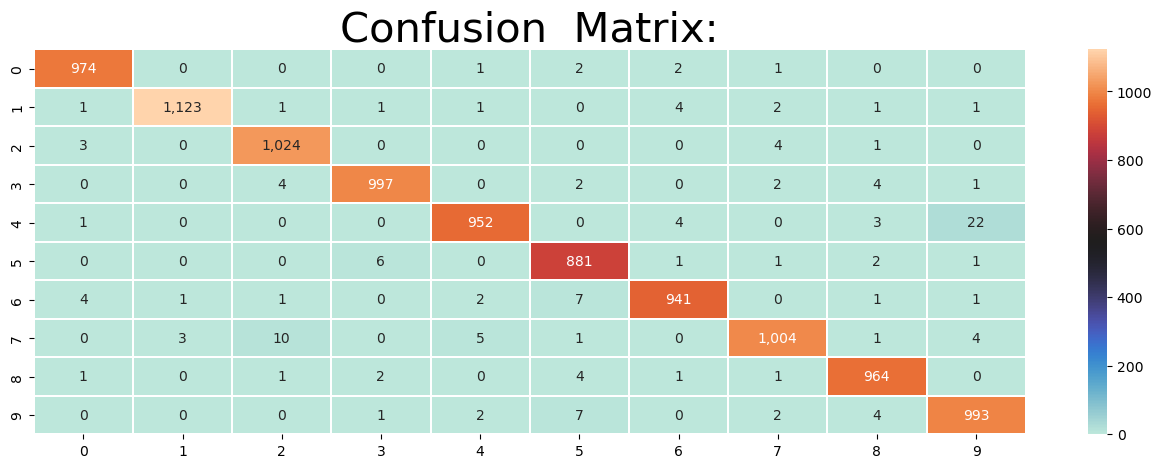

In [40]:
plt.figure(figsize=(16,5))
sns.heatmap(confusion,cmap = 'icefire', annot= True, linewidths=0.1,fmt =',' )
plt.title("Confusion  Matrix:",fontsize = 30);

In [44]:
pwd

'C:\\Users\\shwet'